<p>Hi, I'm going to apply and compare 6 supervised machine learning classification models on the given dataset to predict if the patient deceased during the follow-up period.</p>

<ol>
<li>Logistic Regression</li>
<li>Naive Bayes</li>
<li>SVM (Linear Kernel)</li>
<li>SVM (RBF Kernel)</li>
<li>Random Forest</li>
<li>Decision Tree</li>
</ol>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/heart_failure_clinical_records_dataset.csv


# Importing Libraries

In [2]:
# linear algebra
import numpy as np  

# data processing
import pandas as pd  

# data visualising
import matplotlib.pyplot as plt 
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model building
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree

# model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

# k-fold cross validation
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [3]:
dataset = pd.read_csv("input/heart_failure_clinical_records_dataset.csv")

In [4]:
dataset.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [5]:
dataset.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [6]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Visualisation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

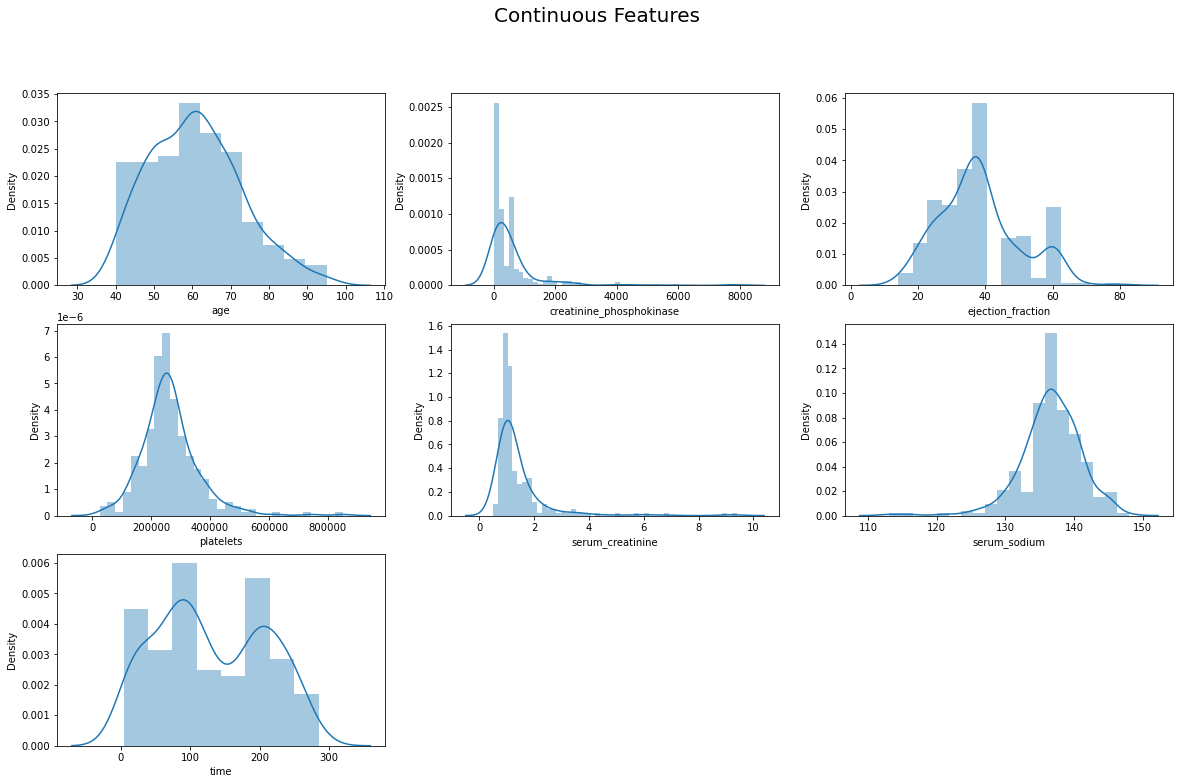

In [8]:
plt.figure(figsize=(20,12))
plt.suptitle('Continuous Features', fontsize=20)
for i in range(0, dataset[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].shape[1]):
    plt.subplot(3, 3, i+1)

    sns.distplot(dataset[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].iloc[:, i])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

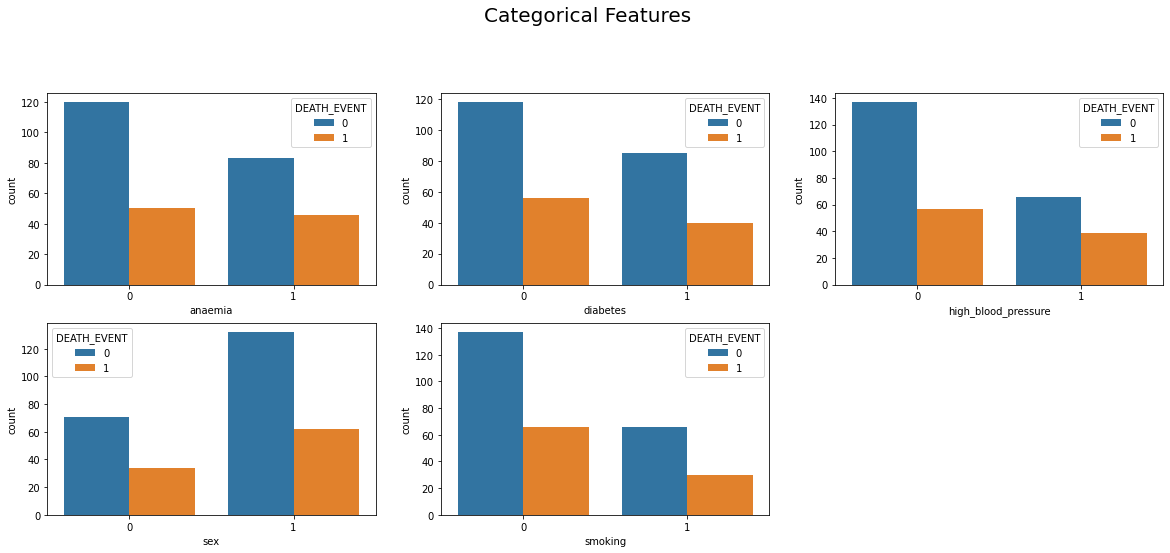

In [9]:
plt.figure(figsize=(20,12))
plt.suptitle('Categorical Features', fontsize=20)
for i in range(0, dataset[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']].shape[1]):
    plt.subplot(3, 3, i+1)

    sns.countplot(dataset[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']].iloc[:, i], hue=dataset['DEATH_EVENT'])

# Correlations between Features

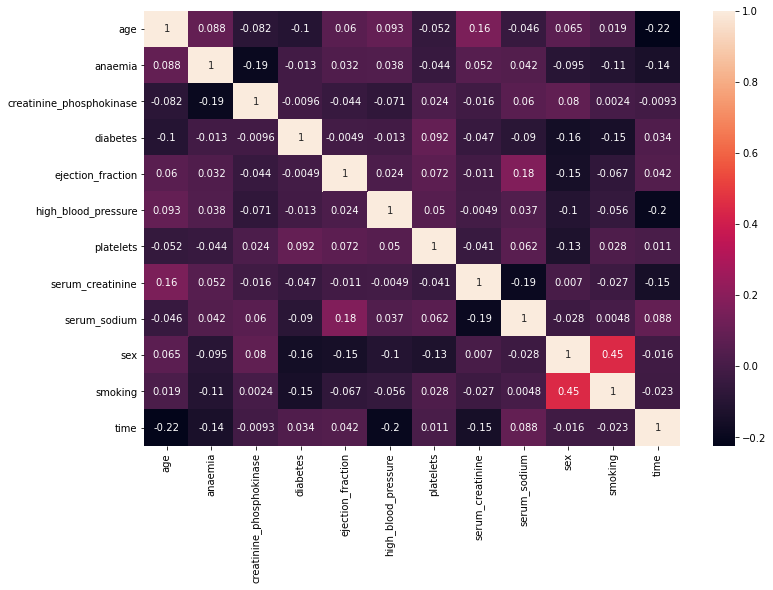

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(columns=['DEATH_EVENT']).corr(), annot=True)
plt.show()

# Correlations of features with Response Variable

In [11]:
dataset.drop(columns=['DEATH_EVENT']).corrwith(dataset['DEATH_EVENT'])

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
dtype: float64

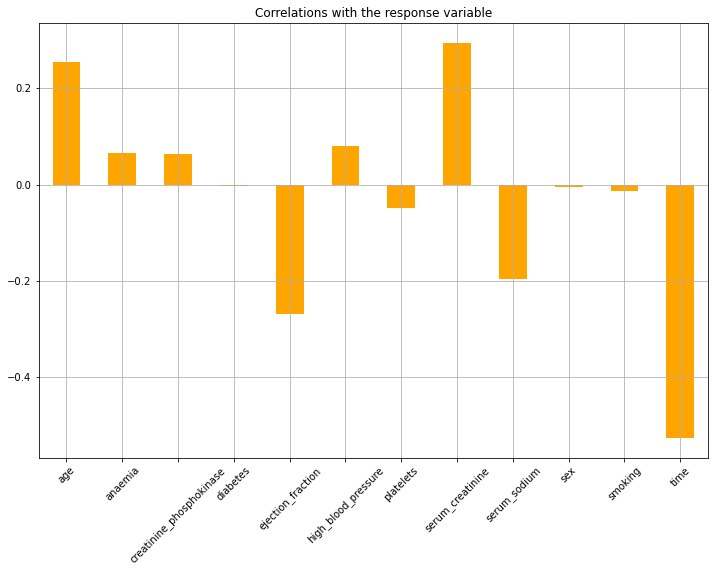

In [12]:
plt.figure(figsize=(12,8))
dataset.drop(columns=['DEATH_EVENT']).corrwith(dataset['DEATH_EVENT']).plot.bar(title = 'Correlations with the response variable', rot = 45, grid = True, color = 'orange')
plt.show()

In [13]:
# Finding the features having correlation more than 0.1 or less than -0.1
columns = dataset.drop(columns=['DEATH_EVENT']).columns[np.array(abs(dataset.drop(columns=['DEATH_EVENT']).corrwith(dataset['DEATH_EVENT']).array) > 0.1)]
print(columns)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], dtype='object')


# Data Preprocessing

In [14]:
# Rejecting the features with weak correlations
X = dataset[columns]
y = dataset['DEATH_EVENT']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

# Logistic Regression Model

In [17]:
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)

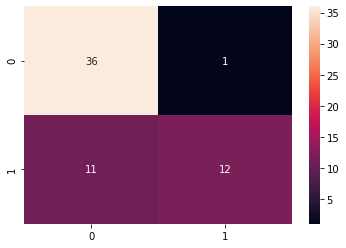

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)
plt.show()

In [19]:
accuracy_score(y_test, y_pred_lr)

0.8

In [20]:
model = []
model_accuracy = []

In [21]:
model.append('Logistic Regression')
model_accuracy.append(accuracy_score(y_test, y_pred_lr))

# Naive Bayes Model

In [22]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

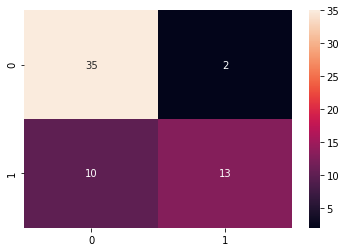

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True)
plt.show()

In [24]:
accuracy_score(y_test, y_pred_nb)

0.8

In [25]:
model.append('Naive Bayes')
model_accuracy.append(accuracy_score(y_test, y_pred_nb))

# SVM Model (Linear Kernel)

In [26]:
classifier_svm_l = SVC(random_state = 0, kernel='linear')
classifier_svm_l.fit(X_train, y_train)
y_pred_svm_l = classifier_svm_l.predict(X_test)

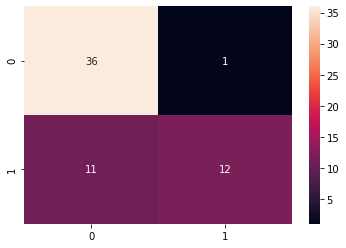

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_l), annot=True)
plt.show()

In [28]:
accuracy_score(y_test, y_pred_svm_l)

0.8

In [29]:
model.append('SVM Linear')
model_accuracy.append(accuracy_score(y_test, y_pred_svm_l))

# SVM Model (RBF Kernel)

In [30]:
classifier_svm_rbf = SVC(random_state = 0, kernel='rbf')
classifier_svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)

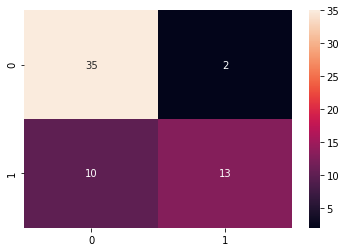

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf), annot=True)
plt.show()

In [32]:
accuracy_score(y_test, y_pred_svm_rbf)

0.8

In [33]:
model.append('SVM rbf')
model_accuracy.append(accuracy_score(y_test, y_pred_svm_rbf))

# Random Forest Model

In [34]:
classifier_rf = RandomForestClassifier(criterion='entropy', n_jobs=10, random_state=10)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

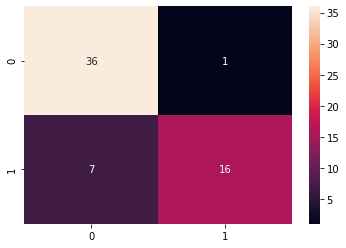

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.show()

In [36]:
accuracy_score(y_test, y_pred_rf)

0.8666666666666667

In [37]:
model.append('Random Forest')
model_accuracy.append(accuracy_score(y_test, y_pred_rf))

# Decision Tree Model

In [38]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)

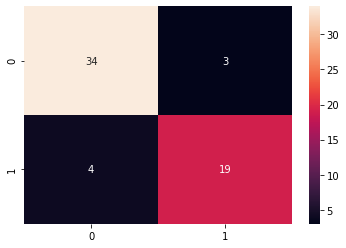

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
plt.show()

In [40]:
accuracy_score(y_test, y_pred_dt)

0.8833333333333333

In [41]:
model.append('Decision Tree')
model_accuracy.append(accuracy_score(y_test, y_pred_dt))

# Comparing the Models

In [42]:
# Printing the models alongside their accuracies
print(np.concatenate((np.array(model).reshape(len(model),1), np.array(model_accuracy).reshape(len(model),1)), axis=1))

[['Logistic Regression' '0.8']
 ['Naive Bayes' '0.8']
 ['SVM Linear' '0.8']
 ['SVM rbf' '0.8']
 ['Random Forest' '0.8666666666666667']
 ['Decision Tree' '0.8833333333333333']]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


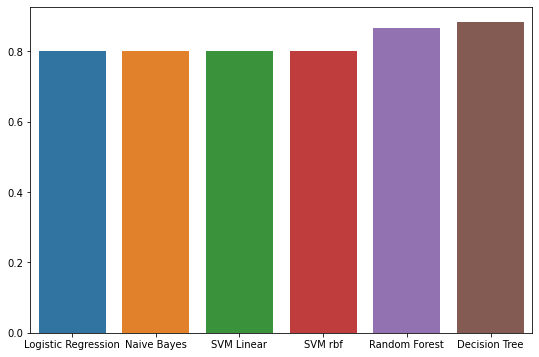

In [43]:
plt.figure(figsize=(9,6))
sns.barplot(model, model_accuracy)
plt.show()

# K-Fold Cross Validation

In [44]:
# Calculating K Fold Cross Validation scores for the models
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)
accuracies_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 10)
accuracies_svm_l = cross_val_score(estimator = classifier_svm_l, X = X_train, y = y_train, cv = 10)
accuracies_svm_rbf = cross_val_score(estimator = classifier_svm_rbf, X = X_train, y = y_train, cv = 10)
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)

In [45]:
kfold_acc_mean = [np.mean(accuracies_lr), np.mean(accuracies_nb), np.mean(accuracies_svm_l), np.mean(accuracies_svm_rbf), np.mean(accuracies_rf), np.mean(accuracies_dt)]

In [46]:
kfold_acc_std = [np.std(accuracies_lr), np.std(accuracies_nb), np.std(accuracies_svm_l), np.std(accuracies_svm_rbf), np.std(accuracies_rf), np.std(accuracies_dt)]

In [47]:
KFold = pd.DataFrame({'Model': model, 'KFold accuracies mean': kfold_acc_mean, 'KFold accuracies std': kfold_acc_std})
print(KFold)

                 Model  KFold accuracies mean  KFold accuracies std
0  Logistic Regression               0.841123              0.048245
1          Naive Bayes               0.803442              0.069577
2           SVM Linear               0.836957              0.053814
3              SVM rbf               0.807246              0.051356
4        Random Forest               0.861775              0.042432
5        Decision Tree               0.807609              0.046057


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


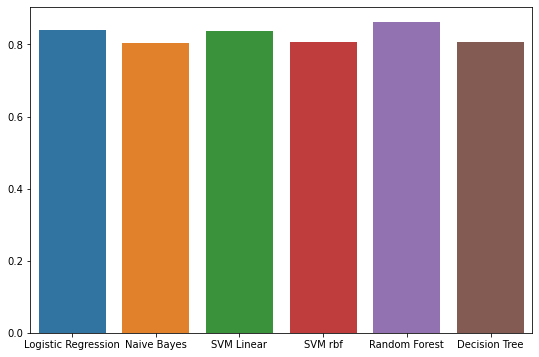

In [48]:
plt.figure(figsize=(9,6))
sns.barplot(model, kfold_acc_mean)
plt.show()